In [41]:
import numpy as np
import pandas as pd
import humanize as hz
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df_covid_iniziale = pd.read_csv("C:\COVID_19_Pr\owid-covid-data.csv", low_memory=False)

In [43]:
df_covid_iniziale.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN


In [44]:
df_covid_iniziale["date"] = pd.to_datetime(df_covid_iniziale["date"])

In [45]:
df_covid_iniziale["year"] = df_covid_iniziale["date"].dt.year

In [46]:
df_covid_iniziale["date"] = df_covid_iniziale["date"].astype(str)

In [47]:
df_covid_iniziale.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
year                                         int32
Length: 68, dtype: object

In [48]:
df_covid_iniziale["year"] = df_covid_iniziale["year"].astype(str)

In [49]:
df_covid = df_covid_iniziale

In [50]:
df_covid.size

23805780

In [51]:
df_covid.shape

(350085, 68)

In [52]:
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [53]:
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN,2020
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN,2020
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN,2020
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN,2020
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN,2020


In [54]:
df_covid.sample(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year
131385,GUY,South America,Guyana,2023-05-23,73207.00,0.00,0.00,1298.00,0.00,0.00,...,77.16,1.60,69.91,0.68,808727.00,NaN,NaN,NaN,NaN,2023
83595,DOM,North America,Dominican Republic,2021-04-15,259260.00,623.00,617.57,3402.00,5.00,4.71,...,55.18,1.60,74.08,0.76,11228821.00,NaN,NaN,NaN,NaN,2021
328898,GBR,Europe,United Kingdom,2022-03-15,19783507.00,75739.00,69645.71,189244.00,112.00,116.71,...,NaN,2.54,81.32,0.93,67508936.00,NaN,NaN,NaN,NaN,2022
47654,BFA,Africa,Burkina Faso,2021-06-28,13479.00,1.00,1.43,168.00,0.00,0.14,...,11.88,0.40,61.58,0.45,22673764.00,NaN,NaN,NaN,NaN,2021
101719,FLK,South America,Falkland Islands,2021-10-23,69.00,0.00,0.00,NaN,0.00,0.00,...,NaN,NaN,81.44,NaN,3801.00,NaN,NaN,NaN,NaN,2021
334284,URY,South America,Uruguay,2021-10-07,389363.00,103.00,94.71,6059.00,1.00,0.86,...,NaN,2.80,77.91,0.82,3422796.00,NaN,NaN,NaN,NaN,2021
192553,MRT,Africa,Mauritania,2021-12-21,40126.00,43.00,42.00,855.00,2.00,0.71,...,15.95,NaN,64.92,0.55,4736146.00,NaN,NaN,NaN,NaN,2021
298317,SDN,Africa,Sudan,2021-10-24,40433.00,4.00,84.86,2995.00,0.00,2.29,...,23.44,0.80,65.31,0.51,46874200.00,NaN,NaN,NaN,NaN,2021
98537,OWID_EUN,NaN,European Union,2020-09-11,1963687.00,8352.00,26010.86,133589.00,87.00,193.57,...,NaN,NaN,NaN,NaN,450146793.00,NaN,NaN,NaN,NaN,2020
293637,SSD,Africa,South Sudan,2020-05-17,285.00,3.00,23.57,6.00,0.00,0.86,...,NaN,NaN,57.85,0.43,10913172.00,NaN,NaN,NaN,NaN,2020


In [55]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350085 entries, 0 to 350084
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    350085 non-null  object 
 1   continent                                   333420 non-null  object 
 2   location                                    350085 non-null  object 
 3   date                                        350085 non-null  object 
 4   total_cases                                 312088 non-null  float64
 5   new_cases                                   340457 non-null  float64
 6   new_cases_smoothed                          339198 non-null  float64
 7   total_deaths                                290501 non-null  float64
 8   new_deaths                                  340511 non-null  float64
 9   new_deaths_smoothed                         339281 non-null  float64
 

In [56]:
pd.set_option("display.float_format", lambda x: '%.2f' % x)
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,312088.00,340457.00,339198.00,290501.00,340511.00,339281.00,312088.00,340457.00,339198.00,290501.00,...,200889.00,132973.00,239669.00,322072.00,263138.00,350085.00,12184.00,12184.00,12184.00,12184.00
mean,6683354.19,9601.63,9637.07,86021.80,85.51,85.82,101749.85,145.16,145.70,872.29,...,32.91,50.79,3.10,73.71,0.72,128463325.15,52816.37,9.74,11.35,1669.03
std,40689025.72,110276.89,94477.84,439887.28,613.69,559.13,151265.69,1163.71,599.96,1100.19,...,13.57,31.96,2.55,7.40,0.15,660769408.04,149219.51,12.30,25.18,1938.56
min,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.70,1.19,0.10,53.28,0.39,47.00,-37726.10,-44.23,-95.92,-2752.92
25%,8090.00,0.00,0.29,127.00,0.00,0.00,2595.58,0.00,0.04,60.61,...,22.60,20.86,1.30,69.59,0.60,449002.00,120.23,1.40,-1.60,72.40
50%,70205.00,2.00,24.86,1328.00,0.00,0.14,28307.66,0.13,6.52,377.17,...,33.10,49.84,2.50,75.05,0.74,5882259.00,5885.85,8.07,5.72,1105.40
75%,740955.75,264.00,497.86,11922.00,3.00,5.14,133506.24,35.47,82.41,1365.92,...,41.30,82.50,4.20,79.46,0.83,28301700.00,37423.44,15.36,16.30,2740.13
max,771407061.00,8401961.00,6402036.29,6972139.00,27939.00,14822.00,737554.51,228872.02,37241.78,6511.21,...,78.10,100.00,13.80,86.75,0.96,7975105024.00,1289776.50,76.62,377.63,10292.92


2. For each continent, find the total number of cases that occurred in that same continent; do not consider any locations in the dataset that do not belong to any continent.

In [57]:
df_covid["continent"].value_counts()

continent
Africa           78946
Europe           75794
Asia             69247
North America    56792
Oceania          33241
South America    19400
Name: count, dtype: int64

In [58]:
df_covid["continent"].isna().any()

np.True_

In [60]:
covid_null = df_covid["continent"].isnull()
covid_null.sum()

np.int64(16665)

In [61]:
df_covid = df_covid.dropna(subset=["continent"])

In [62]:
total_cases_continent = df_covid.groupby("continent")["new_cases"].sum().reset_index()
total_cases_continent["cases_continent"] = total_cases_continent["new_cases"].apply(hz.intword)

In [63]:
total_cases_continent[["continent", "cases_continent"]]

,continent,cases_continent
0,Africa,13.1 million
1,Asia,300.7 million
2,Europe,249.8 million
3,North America,124.5 million
4,Oceania,14.5 million
5,South America,68.8 million


In [64]:
df_group_continent_year = df_covid.groupby(["continent", "year"])["new_cases"].sum().reset_index()

In [65]:
df_group_continent_year["cumulative_new_cases"] = df_group_continent_year.groupby("continent")["new_cases"].cumsum()

<Axes: xlabel='year', ylabel='cumulative_new_cases'>

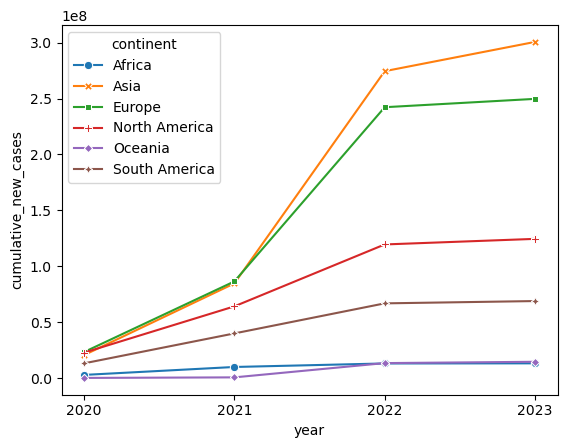

In [66]:
sns.lineplot(data=df_group_continent_year, x="year", y="cumulative_new_cases", hue="continent",style="continent", markers=True, dashes=False)

3. Regarding the total COVID cases, develop a function that takes as input the dataset and two continent names, and compares the following relative statistical descriptors: minimum and maximum values, mean, and percentage relative to the total number of cases worldwide (also calculated on locations without indication of continent).

In [67]:
df_covid["new_cases"].sum()

np.float64(771487863.0)

In [68]:
df_covid_iniziale["new_cases"].sum()

np.float64(3268943666.0)

In [69]:
def comparison_stat_values(dataset, continent1, continent2):

    df_covid = dataset.dropna(subset=["continent"])

    total_cases_worldwide = df_covid_iniziale["new_cases"].sum()                      
    
    df_continent1 = df_covid[df_covid["continent"] == continent1]
    df_continent2 = df_covid[df_covid["continent"] == continent2]

    
    values_continent1 = {
        "Min": df_continent1["new_cases"].min(),
        "Daily Max": df_continent1["new_cases"].max(),          
        "Max": df_continent1["total_cases"].max(),
        "Daily Mean": df_continent1["new_cases"].mean(),      
        "Mean": df_continent1["total_cases"].mean(),
        "Percentage_worldwide": (df_continent1["new_cases"].sum() / total_cases_worldwide) * 100
    }

    values_continent2 = {
        "Min": df_continent2["new_cases"].min(),
        "Daily Max": df_continent2["new_cases"].max(),          
        "Max": df_continent2["total_cases"].max(),
        "Daily Mean": df_continent2["new_cases"].mean(),      
        "Mean": df_continent2["total_cases"].mean(),
        "Percentage_worldwide": (df_continent2["new_cases"].sum() / total_cases_worldwide) * 100
    }

    
    return values_continent1, values_continent2

In [70]:
continent1 = "Europe"
continent2 = "Asia"

comparison_stat_values(df_covid, continent1, continent2)

({'Min': 0.0,
  'Daily Max': 2417043.0,
  'Max': 38997490.0,
  'Daily Mean': np.float64(3537.412267036764),
  'Mean': np.float64(2414271.2876789058),
  'Percentage_worldwide': np.float64(7.641115311896598)},
 {'Min': 0.0,
  'Daily Max': 6966046.0,
  'Max': 99315684.0,
  'Daily Mean': np.float64(4622.978495119514),
  'Mean': np.float64(2789263.323428726),
  'Percentage_worldwide': np.float64(9.200154445243353)})

In [71]:
values = pd.DataFrame(comparison_stat_values(df_covid, continent1, continent2), index=["Europe", "Asia"])
values.round(2)

,Min,Daily Max,Max,Daily Mean,Mean,Percentage_worldwide
Europe,0.00,2417043.00,38997490.00,3537.41,2414271.29,7.64
Asia,0.00,6966046.00,99315684.00,4622.98,2789263.32,9.20


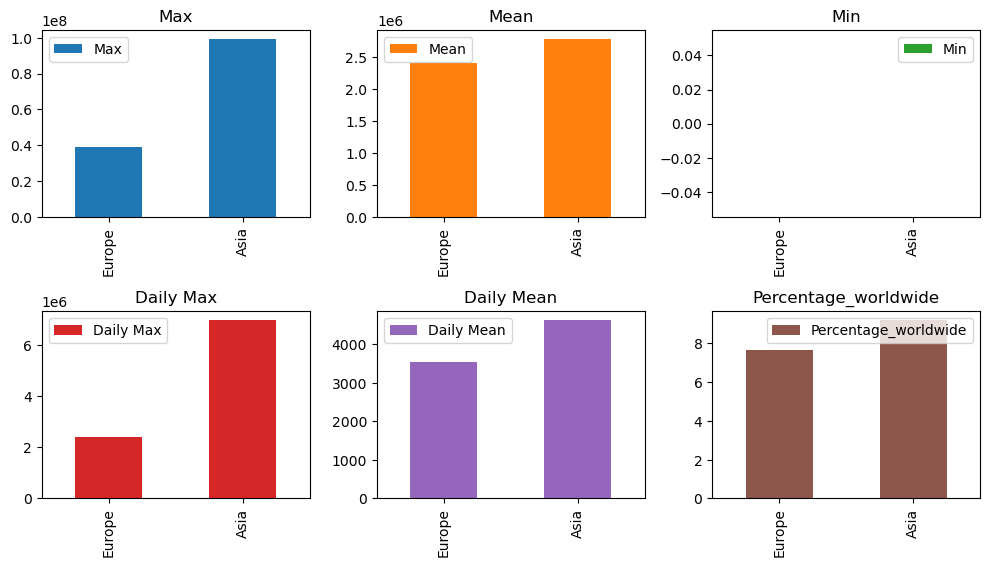

In [72]:
metrics = ["Max", "Mean", "Min", "Daily Max", "Daily Mean", "Percentage_worldwide"]

values[metrics].plot(kind="bar", subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)

plt.tight_layout()
plt.show()